In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_excel('/content/2018_final_data_set.xlsx')
df2=pd.read_excel('/content/2019_final_data_set.xlsx')
df3=pd.read_excel('/content/2020_final_data_set.xlsx')

In [ ]:
df['Year']=2018
df2['Year']=2019
df3['Year']=2020

In [ ]:
dff=pd.concat([df,df2,df3])

In [ ]:
dff.shape

(50709, 43)

In [ ]:
dff.isna().sum()

Sector                                         0
SubSector                                      0
Organization                                   0
Operation                                      0
Operation Type                                 0
Address                                       33
City                                           0
Postal Code                                   45
Total Indoor Space_x                           0
Unit of Measure                             1330
Weekly Average Hours                           0
Annual Flow (M                             21064
Number of Portables                           26
Swimming Pool                              31847
Electricity_Quantity                          10
Electricity_Unit                             882
NaturalGas_Quantity                          357
NaturalGas_Unit                            17492
FuelOil12_Quantity                           567
FuelOil12_Unit                             49345
FuelOil46_Quantity  

In [ ]:
null_threshold = 0.3
# Calculate the percentage of null values in each column
null_percentages = dff.isnull().mean()
# Identify columns with null values exceeding the threshold
columns_to_drop = null_percentages[null_percentages > null_threshold].index
# Drop columns with too many null values
dff = dff.drop(columns=columns_to_drop)

In [ ]:
dff.shape

(50709, 30)

In [ ]:
dff.isna().sum()

Sector                                        0
SubSector                                     0
Organization                                  0
Operation                                     0
Operation Type                                0
Address                                      33
City                                          0
Postal Code                                  45
Total Indoor Space_x                          0
Unit of Measure                            1330
Weekly Average Hours                          0
Number of Portables                          26
Electricity_Quantity                         10
Electricity_Unit                            882
NaturalGas_Quantity                         357
FuelOil12_Quantity                          567
FuelOil46_Quantity                          590
Propane_Quantity                            543
Coal_Quantity                               594
Wood_Quantity                               596
DistrictHeating_Quantity                

In [ ]:
dff.dropna(axis=0,inplace=True)

In [ ]:
dff.shape

(47832, 30)

In [ ]:
dff.describe()

,Total Indoor Space_x,Weekly Average Hours,Number of Portables,Electricity_Quantity,NaturalGas_Quantity,FuelOil12_Quantity,FuelOil46_Quantity,Propane_Quantity,Wood_Quantity,DistrictHeating_Quantity,DistrictHeating_RenewableEmissionFactor,DistrictCooling_Quantity,DistrictCooling_RenewableEmissionFactor,GHG Emissions KG,Energy Intensity ekWh_sqft,Energy Intensity ekWh_mega_litre,Energy Intensity GJ_m2,Energy Intensity GJ_mega_litre,Year
count,4.783200e+04,47832.000000,47832.000000,4.783200e+04,4.783200e+04,47832.000000,47832.000000,4.783200e+04,47832.000000,4.783200e+04,47832.000000,47832.000000,47832.000000,4.783200e+04,4.783200e+04,4.783200e+04,4.783200e+04,4.783200e+04,47832.000000
mean,6.628018e+04,85.900540,0.497199,5.936057e+05,6.941645e+04,446.093277,38.228511,9.523686e+02,0.008457,3.615373e+03,0.050188,40.334573,0.000631,3.679334e+05,3.969606e+04,6.246260e+12,1.538226e+03,2.248654e+10,2019.028328
std,3.103426e+06,242.817511,1.912370,3.910568e+06,5.762306e+05,8106.503338,2519.282383,1.008148e+04,0.807337,5.935591e+05,4.355409,1687.109175,0.038491,3.524963e+07,7.538257e+05,1.364440e+15,2.921075e+04,4.911983e+12,0.813666
min,0.000000e+00,0.000100,0.000000,1.000000e-08,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.566432e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2018.000000
25%,9.100000e+02,40.000000,0.000000,2.465384e+04,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,5.432399e+03,1.362509e+01,0.000000e+00,5.279721e-01,0.000000e+00,2018.000000
50%,7.739000e+03,70.000000,0.000000,1.191614e+05,1.197174e+04,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,3.467839e+04,2.066050e+01,0.000000e+00,8.005942e-01,0.000000e+00,2019.000000
75%,3.968805e+04,120.052500,0.000000,3.447305e+05,4.725179e+04,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.036295e+05,3.532110e+01,0.000000e+00,1.368692e+00,0.000000e+00,2020.000000
max,3.959100e+08,29652.000000,50.000000,4.096671e+08,4.140006e+07,986783.100000,500470.000000,1.124754e+06,110.000000,1.216918e+08,871.308000,208198.380000,3.262057,7.217241e+09,4.915117e+07,2.984100e+17,1.904608e+06,1.074276e+15,2020.000000


In [ ]:
numeric_cols=['GHG Emissions KG','Energy Intensity GJ_m2','Total Indoor Space_x','Weekly Average Hours']
for c in numeric_cols:
  q1=dff[c].quantile(0.25)
  q3=dff[c].quantile(0.75)
  IQR=q3-q1
  LC=q1-IQR*1.5
  UC=q3+IQR*1.5
  dff=dff[(dff[c]>=LC) & (dff[c]<=UC)]

<Axes: ylabel='GHG Emissions KG'>

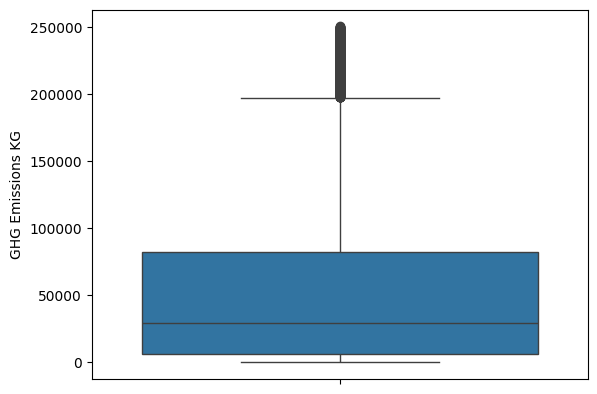

In [ ]:
sns.boxplot(dff['GHG Emissions KG'])

<Axes: ylabel='Energy Intensity GJ_m2'>

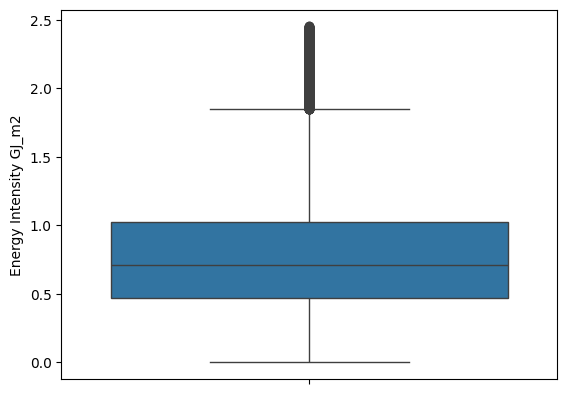

In [ ]:
sns.boxplot(dff['Energy Intensity GJ_m2'])

<ipython-input-87-83ac48c52e8f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dff.corr()


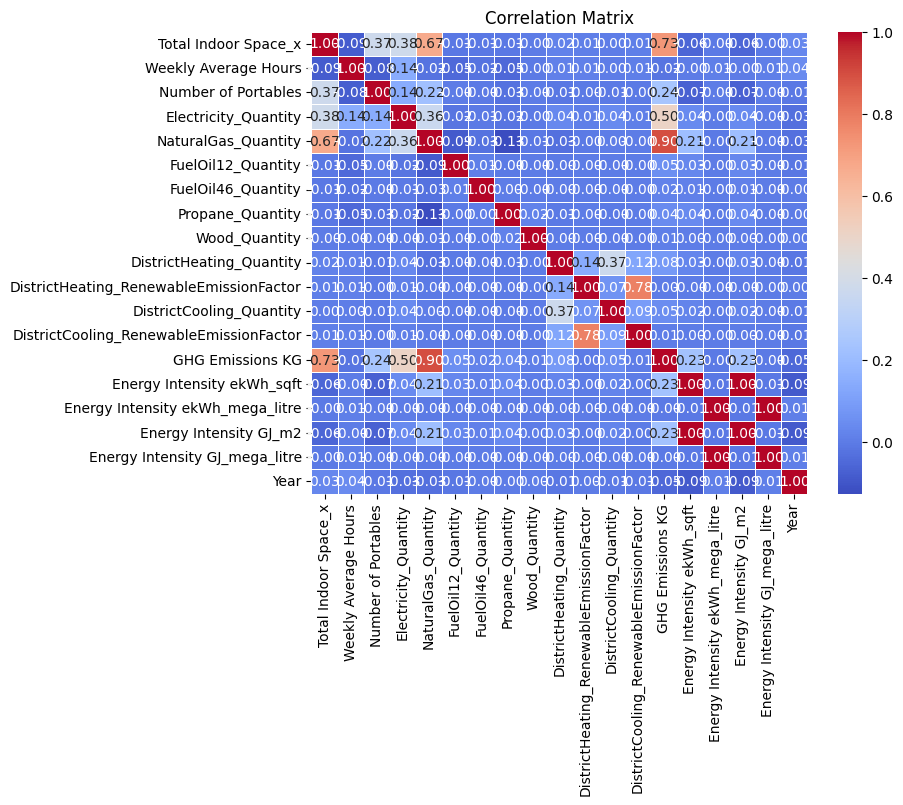

In [ ]:
correlation_matrix = dff.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

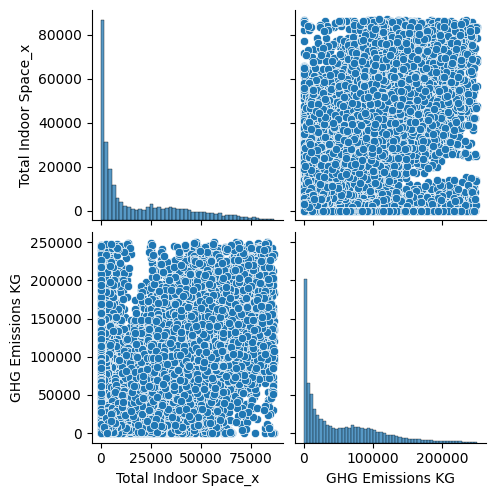

In [ ]:
sns.pairplot(dff[['Total Indoor Space_x','GHG Emissions KG']])

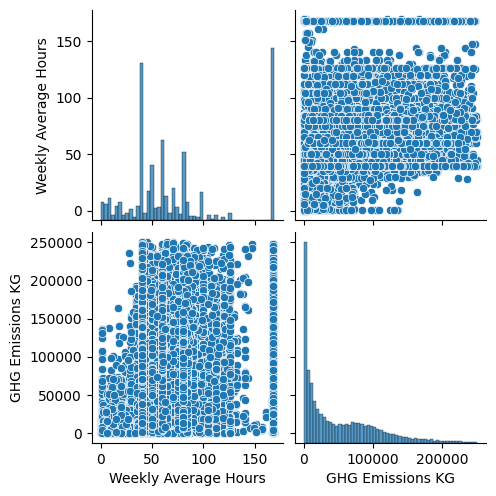

In [ ]:
sns.pairplot(dff[['Weekly Average Hours','GHG Emissions KG']])